In [1]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

Read and pre-process data

In [2]:
# fetch data 

diamonds_data = pd.read_csv('diamonds.csv')

diamonds_data.head()

,rownames,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75


In [3]:
#column data types
diamonds_data.dtypes

rownames      int64
carat       float64
cut          object
color        object
clarity      object
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [4]:
#dropping rownames column

diamonds_data = diamonds_data.drop(columns = ['rownames'], axis=1)

diamonds_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75


In [5]:
#NaN values
diamonds_data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

There are no NaN values in the dataframe

In [80]:
#No. of rows
print("Number of rows in the dataframe are",diamonds_data.shape[0])

Number of rows in the dataframe are 53940


In [7]:
#values taken by the three categorical variables

cut_values = diamonds_data['cut'].unique()
print("Set of values for 'cut':", cut_values)

# To get unique values for the 'color' categorical variable
color_values = diamonds_data['color'].unique()
print("Set of values for 'color':", color_values)

# To get unique values for the 'clarity' categorical variable
clarity_values = diamonds_data['clarity'].unique()
print("Set of values for 'clarity':", clarity_values)

Set of values for 'cut': ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Set of values for 'color': ['E' 'I' 'J' 'H' 'F' 'G' 'D']
Set of values for 'clarity': ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


Simple Linear Regression

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap between spx, dax, ftse, and nikkei')

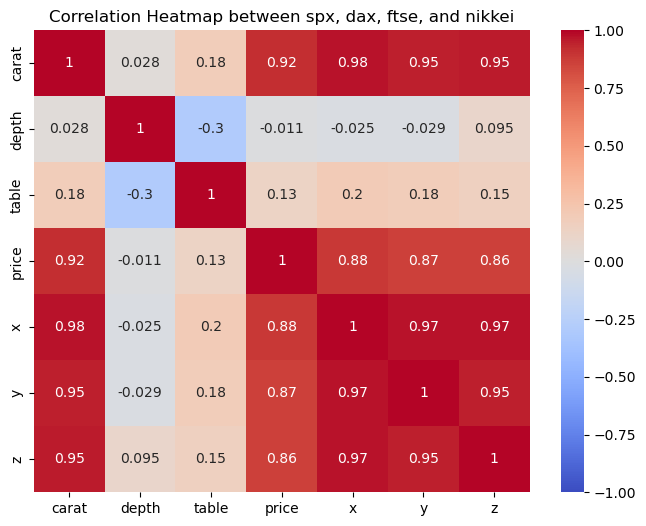

In [8]:
import seaborn as sns
df_without_categorical_values = diamonds_data.drop(columns = ['cut', 'color', 'clarity'], axis=1)
corr_matrix = df_without_categorical_values.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between spx, dax, ftse, and nikkei')
plt.show()

carat has the highest correlation with price

In [9]:
X = diamonds_data['carat']

In [10]:
Y = diamonds_data['price']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 50)

In [12]:
train_length = X_train.shape[0]
test_length = X_test.shape[0]

print('Length of train and test data are:', train_length , test_length )

Length of train and test data are: 40455 13485


In [13]:
first_row_index_train = X_train.index[0]
first_row_index_test = X_test.index[0]

print("First row index of X_train:", first_row_index_train)
print("First row index of X_test:", first_row_index_test)

First row index of X_train: 32301
First row index of X_test: 44751


In [14]:
model = LinearRegression(fit_intercept = True)
model.fit(X_train.array.reshape(-1, 1), y_train.array.reshape(-1, 1))

LinearRegression()

In [15]:
# The following gives the R-square score
model.score(X_train.array.reshape(-1, 1), y_train.array.reshape(-1, 1)) # When extending to multiple features remove .array.reshape(-1, 1)

# This is the coefficient Beta_1 (or slope of the Simple Linear Regression line)
model.coef_

# This is the coefficient Beta_0
model.intercept_

0.8486051211546091

array([[7740.34546342]])

array([-2244.80400041])

An R-square score of approximately 0.85 suggests that the model explains about 85% of the variance in the target variable, which is generally considered a strong correlation and indicates a good fit.

Coefficients


1) Beta_1 (Coefficient for the Independent Variable): 7740.34546342
This coefficient represents the slope of the regression line in the case of simple linear regression (or the effect size of the variable in multiple regression). It indicates how much the dependent variable is expected to increase (or decrease, if the coefficient was negative) when the independent variable increases by one unit. In this context, a coefficient of approximately 7740.35 means that for each one-unit increase in the independent variable, the dependent variable is expected to increase by about 7740.35 units. This value suggests a strong positive relationship between the independent variable and the dependent variable.

2) Beta_0 (Intercept): -2244.80400041
The intercept, or Beta_0, represents the expected value of the dependent variable when all independent variables are equal to zero. An intercept of approximately -2244.80 indicates that if the independent variable(s) were to be 0, the expected value of the dependent variable would be -2244.80.

In [250]:
# Calculate R-squared on test data
model.score(X_test.array.reshape(-1, 1), y_test.array.reshape(-1, 1))

0.8514897700970667

In [84]:
test_output = pd.DataFrame(model.predict(X_test.array.reshape(-1, 1)), index = X_test.index, columns = ['pred_price'])

In [17]:
test_output.head()

,pred_price
44751,"1,702.77"
22963,"13,313.29"
9078,"6,114.77"
26148,"14,242.13"
29451,309.51


In [18]:
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_price'] - test_output['price']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)

,pred_price,price
44751,"1,702.77",1619
22963,"13,313.29",11011
9078,"6,114.77",4521
26148,"14,242.13",15454
29451,309.51,702


Mean absolute error is 
998.4973200867355


In [19]:
average_price_test = y_test.mean()

In [20]:
fraction_mae = mean_absolute_error / average_price_test
print("Fraction of MAE to Average Price:", fraction_mae)

Fraction of MAE to Average Price: 0.2541206399951147


A fraction of approximately 0.254 means that the mean absolute error is about 25.4% of the average price in the test set. 

An MAE of 998.5 and its fraction of 25.4% of the average price indicate that, despite the good fit, the average prediction error may still represent a significant portion of the price.

Multiple Linear Regression:

In [33]:
X2 = diamonds_data.drop(columns = ['cut', 'color', 'clarity', 'price'], axis=1)

In [34]:
X2.head()

,carat,depth,table,x,y,z
0,0.23,61.50,55.00,3.95,3.98,2.43
1,0.21,59.80,61.00,3.89,3.84,2.31
2,0.23,56.90,65.00,4.05,4.07,2.31
3,0.29,62.40,58.00,4.20,4.23,2.63
4,0.31,63.30,58.00,4.34,4.35,2.75


In [35]:
Y2 = diamonds_data["price"]

In [36]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.25, random_state = 50)

In [42]:
X2_train
X2_test
y2_test
y2_train

,carat,depth,table,x,y,z
32301,0.37,60.70,60.00,4.65,4.68,2.83
39009,0.40,61.70,57.00,4.77,4.73,2.93
22757,1.02,61.40,58.00,6.46,6.43,3.96
15129,1.07,62.30,55.00,6.59,6.54,4.09
17861,1.19,61.70,56.00,6.78,6.81,4.19
...,...,...,...,...,...,...
48417,0.70,62.40,58.00,5.62,5.67,3.52
22637,2.00,60.30,56.00,8.27,8.16,4.94
42891,0.51,62.80,57.00,5.12,5.10,3.21
38368,0.53,63.80,57.00,5.10,5.12,3.26


,carat,depth,table,x,y,z
44751,0.51,61.40,58.00,5.13,5.09,3.14
22963,2.01,62.90,54.00,8.06,7.93,5.05
9078,1.08,62.10,59.00,6.57,6.53,4.07
26148,2.13,61.50,57.00,8.27,8.34,5.11
29451,0.33,61.90,56.00,4.46,4.49,2.77
...,...,...,...,...,...,...
8884,1.04,62.40,56.00,6.40,6.48,4.02
34947,0.30,61.90,60.00,4.27,4.29,2.65
21821,1.50,60.20,61.00,7.27,7.32,4.39
9942,1.01,61.10,56.00,6.44,6.48,3.95


44751     1619
22963    11011
9078      4521
26148    15454
29451      702
         ...  
8884      4486
34947      378
21821     9892
9942      4693
8296      4385
Name: price, Length: 13485, dtype: int64

32301      454
39009     1056
22757    10773
15129     6082
17861     7207
         ...  
48417     1971
22637    10685
42891     1359
38368     1023
14000     5698
Name: price, Length: 40455, dtype: int64

In [43]:
train_length2 = X2_train.shape[0]
test_length2 = X2_test.shape[0]

print('Length of train and test data are:', train_length2 , test_length2)

Length of train and test data are: 40455 13485


The length of test and train data are same as the lengths of SLR

In [44]:
first_row_index_train2 = X2_train.index[0]
first_row_index_test2 = X2_test.index[0]

print("First row index of X_train:", first_row_index_train2)
print("First row index of X_test:", first_row_index_test2)

First row index of X_train: 32301
First row index of X_test: 44751


First row index of both test and train data are same as that of SLR

In [45]:
model2 = LinearRegression(fit_intercept = True)
model2.fit(X2_train, y2_train)

LinearRegression()

In [46]:
# The following gives the R-square score on train data
model2.score(X2_train, y2_train) 

# This is the coefficient Beta_1, ..., Beta_7
model2.coef_

# This is the coefficient Beta_0
model2.intercept_

0.8580892707297321

array([10572.42070164,  -212.30889735,  -100.98829263, -1339.48535974,
          28.72790744,   207.71501298])

21184.40695343088

The R-square score for model2 is approximately 0.858, which means that about 85.8% of the variance in the dependent variable is explained by the model. This is a strong score that suggests a good fit of the model to the data, especially in the context of multiple regression where more than one independent variable is used to predict the outcome.

In [251]:
# The following gives the R-square score on train data
model2.score(X2_test, y2_test) 

0.8623985511113466

In [57]:
test_output2 = pd.DataFrame(model2.predict(X2_test), index = X2_test.index, columns = ['pred_price'])

In [58]:
test_output2.head()

,pred_price
44751,"1,610.14"
22963,"14,107.90"
9078,"5,692.50"
26148,"15,113.80"
29451,606.29


In [59]:
test_output2 = test_output2.merge(y2_test, left_index = True, right_index = True)
test_output2.head()
mean_absolute_error2 = abs(test_output2['pred_price'] - test_output2['price']).mean()
print('Mean absolute error is ')
print(mean_absolute_error2)

,pred_price,price
44751,"1,610.14",1619
22963,"14,107.90",11011
9078,"5,692.50",4521
26148,"15,113.80",15454
29451,606.29,702


Mean absolute error is 
882.599634844387


In [60]:
average_price_test2 = y2_test.mean()

In [61]:
fraction_mae2 = mean_absolute_error2 / average_price_test2
print("Fraction of MAE to Average Price:", fraction_mae2)

Fraction of MAE to Average Price: 0.224624322523597


This fraction indicates that the mean absolute error is about 22.5% of the average price in the test set.

Comparison with SLR
For the SLR model, the reported MAE was approximately 998.5, and the fraction of MAE to the average price was about 25.4%. Compared to these values, the MLR model has shown an improvement in both the absolute size of the error (a lower MAE) and the error relative to the average price (a lower fraction).

Conclusion
Yes, the predictions in the test set have improved with the MLR model compared to the SLR model. The reduction in both the MAE and its fraction to the average price indicates that incorporating multiple features into the model has enhanced its predictive accuracy, leading to closer predictions to the actual values and a reduction in the average error magnitude relative to the price scale.

Multiple Linear Regression with Categorical Values

In [197]:
X3 = diamonds_data.drop(columns = ['price'], axis=1)
X3.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.00,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.00,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.90,65.00,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.00,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.00,4.34,4.35,2.75


In [198]:
Y3 = diamonds_data['price']
Y3.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [199]:
print(diamonds_data['cut'].unique()) 
print(diamonds_data['color'].unique())
print(diamonds_data['clarity'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [200]:
diamonds_data['cut'].value_counts() 
diamonds_data['color'].value_counts() 
diamonds_data['clarity'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [201]:
from sklearn.preprocessing import OneHotEncoder

def get_ohe(df, col):
    ohe = OneHotEncoder(drop='first', handle_unknown='error', sparse_output=False, dtype='int')
    ohe.fit(df[[col]])
    temp_df = pd.DataFrame(data=ohe.transform(df[[col]]), columns=ohe.get_feature_names_out())
    # If you have a newer version, replace with columns=ohe.get_feature_names_out()
    df.drop(columns=[col], axis=1, inplace=True)
    df = pd.concat([df.reset_index(drop=True), temp_df], axis=1)
    return df

In [202]:
X3 = get_ohe(X3, 'cut')
X3 = get_ohe(X3, 'color')
X3 = get_ohe(X3, 'clarity')

X3.head(20)


,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.50,55.00,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.80,61.00,3.89,3.84,2.31,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.90,65.00,4.05,4.07,2.31,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.40,58.00,4.20,4.23,2.63,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.30,58.00,4.34,4.35,2.75,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5,0.24,62.80,57.00,3.94,3.96,2.48,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
6,0.24,62.30,57.00,3.95,3.98,2.47,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
7,0.26,61.90,55.00,4.07,4.11,2.53,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
8,0.22,65.10,61.00,3.87,3.78,2.49,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0.23,59.40,61.00,4.00,4.05,2.39,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


Here's how we determine the number of columns in the eventual set after one-hot encoding:

let's consider the unique categories in each of the encoded categorical columns minus one (since we're dropping the first column):

'cut': If it originally has 5 unique values (Fair, Good, Very Good, Premium, Ideal), one-hot encoding with drop='first' will result in 4 columns.
'color': If it has 7 unique values (D through J), one-hot encoding with drop='first' will result in 6 columns.
'clarity': If it has 8 unique values (I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF), one-hot encoding with drop='first' will result in 7 columns.

Total Columns After Encoding
Original non-encoded columns: 6
Encoded columns for 'cut': 4
Encoded columns for 'color': 6
Encoded columns for 'clarity': 7
Total = 6 (original) + 4 (cut) + 6 (color) + 7 (clarity) = 23 columns

23 independent columns + 1 dependent column = 24 total columns in the dataset  


In [204]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, Y3, test_size=0.25, random_state = 50)

In [205]:
model3 = LinearRegression(fit_intercept = True)
model3.fit(X3_train, y3_train)

LinearRegression()

In [206]:
# The following gives the R-square score on train data
model3.score(X3_train, y3_train) 

# This is the coefficient Beta_1, ..., Beta_26
model3.coef_

# This is the coefficient Beta_0
model3.intercept_

0.9197535054831985

array([ 1.11814801e+04, -5.85181599e+01, -2.43103736e+01, -9.47154791e+02,
        4.71160598e+00, -9.21343078e+01,  5.64156045e+02,  8.35219660e+02,
        7.65684380e+02,  7.33319794e+02, -2.25861063e+02, -2.76687793e+02,
       -4.79782911e+02, -9.73649105e+02, -1.46411040e+03, -2.39532202e+03,
        5.45238205e+03,  3.78052359e+03,  2.82037545e+03,  4.70977853e+03,
        4.38909093e+03,  5.12101322e+03,  5.07443217e+03])

1499.3392254312134

The enhanced multiple linear regression model, incorporating extra features like categorical data, significantly improves our result interpretation compared to its predecessor. It achieves a score close to 0.920, signifying a robust fit. The intercept, Beta_0, is estimated to be approximately 1499.339. Each of the model's coefficients indicates the degree to which a particular feature affects the outcome variable. This advancement provides a deeper insight into the various elements affecting predictions, thereby increasing the model's overall usefulness.

In [252]:
# The following gives the R-square score on test data
model3.score(X3_test, y3_test) 

0.9197839099301064

In [207]:
test_output3 = pd.DataFrame(model3.predict(X3_test), index = X3_test.index, columns = ['pred_price'])

In [208]:
test_output3.head()

,pred_price
44751,"1,952.74"
22963,"12,178.85"
9078,"5,091.65"
26148,"15,140.76"
29451,137.09


In [209]:
test_output3 = test_output3.merge(y3_test, left_index = True, right_index = True)
test_output3.head()
mean_absolute_error3 = abs(test_output3['pred_price'] - test_output3['price']).mean()
print('Mean absolute error is ')
print(mean_absolute_error3)

,pred_price,price
44751,"1,952.74",1619
22963,"12,178.85",11011
9078,"5,091.65",4521
26148,"15,140.76",15454
29451,137.09,702


Mean absolute error is 
744.8276400124315


An MAE of approximately 744.82 indicates that, on average, the model's predictions are about 744.82 units away from the actual values. 

In [210]:
average_price_test3 = y3_test.mean()

In [211]:
fraction_mae3 = mean_absolute_error3 / average_price_test3
print("Fraction of MAE to Average Price:", fraction_mae3)

Fraction of MAE to Average Price: 0.18956092596179258


An average absolute error of approximately 745, coupled with its ratio to the mean price being roughly 0.19, indicates that our enhanced model, which includes additional variables, performs commendably in forecasting results. Given that the model now aligns more closely with the data, evidenced by an R-square value close to 0.92, it logically follows that there has been a reduction in predictive errors. This marks a significant enhancement from the previous error ratio of around 0.23, highlighting the beneficial impact of incorporating more variables. Essentially, it signifies an improvement in the predictive accuracy of our model.

Quantile Regression with Categorical Variables

In [212]:
X4 = diamonds_data.drop(columns = ['price'], axis=1)
X4.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.00,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.00,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.90,65.00,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.00,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.00,4.34,4.35,2.75


In [213]:
Y4 = diamonds_data['price']
Y4.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [214]:
X4 = get_ohe(X4, 'cut')
X4 = get_ohe(X4, 'color')
X4 = get_ohe(X4, 'clarity')

X4.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.50,55.00,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.80,61.00,3.89,3.84,2.31,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.90,65.00,4.05,4.07,2.31,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.40,58.00,4.20,4.23,2.63,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.30,58.00,4.34,4.35,2.75,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [215]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, Y4, test_size=0.25, random_state = 50)

In [217]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [253]:
# Create the quantile regression model
mod = sm.QuantReg(Y4, X4)
# Fit the model using the desired quantile
res = mod.fit(q=0.5)  # For median (50th percentile)

# Display the results
print(res.summary())


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.7709
Model:                       QuantReg   Bandwidth:                       54.45
Method:                 Least Squares   Sparsity:                        946.8
Date:                Mon, 12 Feb 2024   No. Observations:                53940
Time:                        22:41:29   Df Residuals:                    53917
                                        Df Model:                           23
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
carat          1.293e+04     19.211    672.807      0.000    1.29e+04     1.3e+04
depth            55.0542      0.839     65.585      0.000      53.409      56.699
table           -20.2867      0.898    -22.591      0.000     -22.047     -18.527
x              -559.4452     12.904  

In [259]:
# Calculate predicted prices
# Assuming 'res' is the result object from fitting your quantile regression model
predicted_prices = X4_test.dot(res.params)

In [262]:
import pandas as pd

# Create a DataFrame with predictions
test_output4 = pd.DataFrame(predicted_prices, columns=['pred_price'])
test_output4 = test_output4.merge(y4_test, left_index = True, right_index = True)
test_output4.head()

,pred_price,price
44751,"1,680.79",1619
22963,"12,603.92",11011
9078,"5,096.39",4521
26148,"15,062.74",15454
29451,430.84,702


In [267]:
mean_absolute_error4 = abs(test_output4['pred_price'] - test_output4['price']).mean()
print('Mean absolute error is ')
print(mean_absolute_error4)

Mean absolute error is 
644.5251556319222


In [268]:
average_price_test4 = y4_test.mean()

In [269]:
fraction_mae4 = mean_absolute_error4 / average_price_test4
print("Fraction of MAE to Average Price:", fraction_mae4)

Fraction of MAE to Average Price: 0.1640336350906855
